# Sprint17 公開されている実装を動かす

In [ ]:
!pip install tensorflow==1.15.0

In [2]:
!pip install keras==2.1.5

In [21]:
#from tensorflow.python.keras.utils import tf_utils
import keras
print(keras.__version__)

2.1.5


In [22]:
import tensorflow

In [23]:
tensorflow.__version__

'1.15.0'

In [139]:
!pip install kaggle

In [6]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
cd /content/drive/My Drive

/content/drive/My Drive


In [145]:
mkdir .kaggle

In [146]:
ls -a

'Colab Notebooks'/   ObjectDetection/   the-simpsons-characters-dataset.zip
 .kaggle/            output/            Untitled0.ipynb
 keras-yolo3/        Simpsons/


In [8]:
!pwd

/content/drive/My Drive


In [ ]:
#cd drive/"My Drive"

/content/drive/My Drive


# New Section

In [147]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json
# セキュリティの為網掛けにします。
token = {"username":"***********","key":"********************************"}
#with open('/content/.kaggle/kaggle.json', 'w') as file:
with open('/content/drive/My Drive/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [10]:
!chmod 600 /content/.kaggle/kaggle.json

In [149]:
!chmod 600 "/content/drive/My Drive/.kaggle/kaggle.json"

In [11]:
pwd

'/content'

In [152]:
ls -a .kaggle

kaggle.json


In [153]:
mkdir　/root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [11]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [155]:
!cp -R "/content/drive/My Drive/.kaggle/kaggle.json" "/root/.kaggle/"

In [156]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [227]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         43           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3401           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      25877           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5807            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        574           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1834   

In [11]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [12]:
os.chdir('/content/drive/My Drive/keras-yolo3')

In [229]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

100% 1.07G/1.08G [00:18<00:00, 63.6MB/s]
100% 1.08G/1.08G [00:18<00:00, 62.8MB/s]


In [ ]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

In [ ]:
!unzip /content/drive/'My Drive'/keras-yolo3/the-simpsons-characters-dataset.zip  -d Simpsons

In [41]:
!pwd

/content/drive/My Drive/keras-yolo3


In [130]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 46 (delta 3), reused 6 (delta 1), pack-reused 28
Unpacking objects: 100% (46/46), done.


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [232]:
!pwd

/content/drive/My Drive/keras-yolo3


In [234]:
#mv Simpsons/simpsons_dataset ObjectDetection/
!mv "Simpsons/simpsons_dataset" "/content/drive/My Drive/keras-yolo3/"


In [7]:
cd ObjectDetection

/content/drive/My Drive/ObjectDetection


## 【問題1】学習と推定

In [ ]:
!python train.py -p annotation.txt

In [22]:
!python train.py -p annotation.txt --n_epochs 200 --n_iters 100

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20200622-082749_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

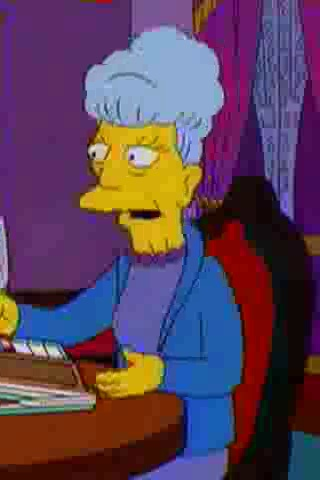

In [18]:
from IPython.display import Image
Image("/content/drive/My Drive/ObjectDetection/simpsons_dataset/agnes_skinner/pic_0002.jpg")

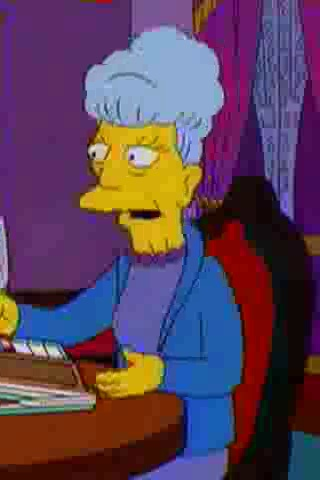

In [19]:
from IPython.display import Image
Image("/content/drive/My Drive/ObjectDetection/output/result_pic_0002.jpg.png")

バウンディングボックスが出力されていないので、学習が足りていないものと考えられる。

## 【問題2】コードリーディング

上記実装のコードリーディングを行ってください。


まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。


（例）


・RPNを実現しているコードはどこか  
・RoIプーリングを実現しているコードはどこか  
・アンカーボックス関連の処理はどこか  

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。


[オリジナルのKerasレイヤーを作成する - Keras Documentation](https://keras.io/ja/layers/writing-your-own-keras-layers/) 


####《参考》


KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。


[Applications - Keras Documentation](https://keras.io/ja/applications/#vgg16)

### ・RPNを実現しているコードはどこか?

⇒model>resnet.pyに  
def rpn(base_layers,num_anchors):  
として定義されている。

### ・RoIプーリングを実現しているコードはどこか?

⇒model>RoiPoolingConv.pyに  
class RoiPoolingConv(Layer):  
が定義されており、  
model>resnet.py内の、    
def classifier(base_layers, input_rois, num_rois, nb_classes = 21, trainable=False)メソッドにて、  
out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])  
として処理されている。

### ・アンカーボックス関連の処理はどこか?

model>config.py内で、
```python  
# サイズ
self.anchor_box_scales = [64, 128, 256, 512]  
# アスペクト比
self.anchor_box_ratios = [[1, 1], [1, 2], [2, 1]]
```
で定義されており、  

model>faster_rcnn.py内の、  
def get_model(C, classes_count)メソッドにて  
num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)  
として使用されている。

# 3.YOLOv3

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。


[qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)](https://github.com/qqwweee/keras-yolo3)


[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement  
[https://pjreddie.com/media/files/papers/YOLOv3.pdf](https://pjreddie.com/media/files/papers/YOLOv3.pdf)



In [9]:
!pwd

/content/drive/My Drive


## 【問題3】学習済みの重みによる推定

学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。


まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。


出力結果を課題の一部として提出してください。 

In [4]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 926.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


In [9]:
cd ..

/content/drive/My Drive


In [10]:
cd keras-yolo3/

/content/drive/My Drive/keras-yolo3


In [25]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-23 10:49:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

yolov3.weights.2    100%[===================>] 236.52M   205KB/s    in 24m 10s 

2020-06-23 11:13:16 (167 KB/s) - ‘yolov3.weights.2’ saved [248007048/248007048]



In [43]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-06-23 11:30:05.945489: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 11:30:05.964563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-23 11:30:05.965460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-06-23 11:30:05.965796: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2

In [21]:
!python yolo_video.py --image --input "/content/drive/My Drive/keras-yolo3/images/import/00152.png" --output "/content/drive/My Drive/keras-yolo3/images/output/detect_00152.png"

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: /content/drive/My Drive/keras-yolo3/images/import/00152.png,/content/drive/My Drive/keras-yolo3/images/output/detect_00152.png
2020-06-22 15:31:22.512687: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-22 15:31:22.535363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-22 15:31:22.536137: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-06-22 15:31:22.536488: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-06-22 15:31:22.537879: I tensorflow/stream_executor/platform/defau

### ＜元画像＞

<img src="https://github.com/takatoshi-ii/diveintocode-ml/blob/master/Sprint/Sprint17_DetectData/00152.png?raw=true">

### ＜検知画像＞

<img src="https://raw.githubusercontent.com/takatoshi-ii/diveintocode-ml/master/Sprint/Sprint17_DetectData/00152_detect.png">

In [ ]:
!python yolo_video.py --input "/content/drive/My Drive/keras-yolo3/videos/train_00.mp4" --output "/content/drive/My Drive/keras-yolo3/video_output/detect_train_00.mp4"

### ＜動画の物体検知結果＞

検知動画<video src="https://github.com/takatoshi-ii/diveintocode-ml/blob/master/Sprint/Sprint17_DetectData/detect_train_00.mp4" controls></video>

In [20]:
from IPython.display import HTML
HTML("""<video src='https://github.com/takatoshi-ii/diveintocode-ml/blob/master/Sprint/Sprint17_DetectData/detect_train_00.mp4' controls></video>""")

## 【問題4】学習のためのファイルを作成

新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

In [73]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ObjectDetection/annotation.txt', header=None)

In [74]:
df

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson
...,...,...,...,...,...,...
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,moe_szyslak
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,moe_szyslak
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,moe_szyslak
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,moe_szyslak


In [58]:
import copy as cp
label_encode_table = cp.deepcopy(df)


In [75]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
le = le.fit(df[5])
#ラベルを整数に変換
df[5] = le.transform(df[5])
label_encode_table = pd.concat([label_encode_table,df[5]], axis = 1)

In [67]:
df

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0
...,...,...,...,...,...,...
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,13


In [77]:
df.iloc[:,0] = df.iloc[:,0].str.replace('.jpg', '.jpg ' + str(df.iloc[:,1]))

In [97]:
pd.set_option('display.max_columns', 100)

In [98]:
df.iloc[:,0]

0       simpsons_dataset/abraham_grampa_simpson/pic_00...
1       simpsons_dataset/abraham_grampa_simpson/pic_00...
2       simpsons_dataset/abraham_grampa_simpson/pic_00...
3       simpsons_dataset/abraham_grampa_simpson/pic_00...
4       simpsons_dataset/abraham_grampa_simpson/pic_00...
                              ...                        
7884    simpsons_dataset/moe_szyslak/pic_0160.jpg 0   ...
7885    simpsons_dataset/moe_szyslak/pic_0033.jpg 0   ...
7886    simpsons_dataset/moe_szyslak/pic_0337.jpg 0   ...
7887    simpsons_dataset/moe_szyslak/pic_1067.jpg 0   ...
7888    simpsons_dataset/moe_szyslak/pic_0928.jpg 0   ...
Name: 0, Length: 7889, dtype: object

In [93]:
temp = df.iloc[2,0]
temp

'simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg 0        57\n1        80\n2       128\n3        72\n4       123\n       ... \n7884     21\n7885     89\n7886     66\n7887    159\n7888    185\nName: 1, Length: 7889, dtype: int64'

In [99]:
df

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0
...,...,...,...,...,...,...
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg 0 ...,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg 0 ...,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg 0 ...,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg 0 ...,159,44,287,247,13


In [100]:
df.to_csv('/content/drive/My Drive/keras-yolo3/Simpsons_annotation.csv')

ファイル名とx_minを連結済みのファイルを読み込むように変更

In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/keras-yolo3/yolo_annotation.csv', header=None)

In [160]:
df

,0,1,2,3,4
0,/content/drive/My Drive/ObjectDetection/simpso...,72,52,72,abraham_grampa_simpson
1,/content/drive/My Drive/ObjectDetection/simpso...,31,337,354,abraham_grampa_simpson
2,/content/drive/My Drive/ObjectDetection/simpso...,48,285,407,abraham_grampa_simpson
3,/content/drive/My Drive/ObjectDetection/simpso...,126,158,275,abraham_grampa_simpson
4,/content/drive/My Drive/ObjectDetection/simpso...,61,294,416,abraham_grampa_simpson
...,...,...,...,...,...
7884,/content/drive/My Drive/ObjectDetection/simpso...,9,69,75,moe_szyslak
7885,/content/drive/My Drive/ObjectDetection/simpso...,8,126,74,moe_szyslak
7886,/content/drive/My Drive/ObjectDetection/simpso...,75,196,245,moe_szyslak
7887,/content/drive/My Drive/ObjectDetection/simpso...,44,287,247,moe_szyslak


In [9]:
import copy as cp
label_encode_table = cp.deepcopy(df)

In [10]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
le = le.fit(df[4])
#ラベルを整数に変換
df[4] = le.transform(df[4])
label_encode_table = pd.concat([label_encode_table,df[4]], axis = 1)

In [11]:
df[0] = '"' + df[0] + '"'

In [193]:
df

,0,1,2,3,4
0,"""/content/drive/My Drive/ObjectDetection/simps...",72,52,72,0
1,"""/content/drive/My Drive/ObjectDetection/simps...",31,337,354,0
2,"""/content/drive/My Drive/ObjectDetection/simps...",48,285,407,0
3,"""/content/drive/My Drive/ObjectDetection/simps...",126,158,275,0
4,"""/content/drive/My Drive/ObjectDetection/simps...",61,294,416,0
...,...,...,...,...,...
7884,"""/content/drive/My Drive/ObjectDetection/simps...",9,69,75,13
7885,"""/content/drive/My Drive/ObjectDetection/simps...",8,126,74,13
7886,"""/content/drive/My Drive/ObjectDetection/simps...",75,196,245,13
7887,"""/content/drive/My Drive/ObjectDetection/simps...",44,287,247,13


### 変換テーブルの作成

In [12]:
label_encode_table

,0,1,2,3,4,4
0,/content/drive/My Drive/ObjectDetection/simpso...,72,52,72,abraham_grampa_simpson,0
1,/content/drive/My Drive/ObjectDetection/simpso...,31,337,354,abraham_grampa_simpson,0
2,/content/drive/My Drive/ObjectDetection/simpso...,48,285,407,abraham_grampa_simpson,0
3,/content/drive/My Drive/ObjectDetection/simpso...,126,158,275,abraham_grampa_simpson,0
4,/content/drive/My Drive/ObjectDetection/simpso...,61,294,416,abraham_grampa_simpson,0
...,...,...,...,...,...,...
7884,/content/drive/My Drive/ObjectDetection/simpso...,9,69,75,moe_szyslak,13
7885,/content/drive/My Drive/ObjectDetection/simpso...,8,126,74,moe_szyslak,13
7886,/content/drive/My Drive/ObjectDetection/simpso...,75,196,245,moe_szyslak,13
7887,/content/drive/My Drive/ObjectDetection/simpso...,44,287,247,moe_szyslak,13


In [13]:
label_encode_table = label_encode_table.drop(columns=df.columns[[0, 1, 2, 3]])

In [14]:
label_encode_table

,4,4
0,abraham_grampa_simpson,0
1,abraham_grampa_simpson,0
2,abraham_grampa_simpson,0
3,abraham_grampa_simpson,0
4,abraham_grampa_simpson,0
...,...,...
7884,moe_szyslak,13
7885,moe_szyslak,13
7886,moe_szyslak,13
7887,moe_szyslak,13


In [15]:
label_encode_table = label_encode_table.drop_duplicates()

In [16]:
label_encode_table

,4,4
0,abraham_grampa_simpson,0
595,apu_nahasapeemapetilon,1
695,bart_simpson,2
1249,charles_montgomery_burns,3
1777,chief_wiggum,4
1883,comic_book_guy,5
1982,edna_krabappel,6
2082,homer_simpson,7
2694,kent_brockman,8
2866,krusty_the_clown,9


In [201]:
df.to_csv('/content/drive/My Drive/keras-yolo3/train.txt', header=False, index=False)

## 【問題5】学習が行えることの確認

問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [44]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-06-23 11:32:29.033135: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 11:32:29.052134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-23 11:32:29.052922: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-06-23 11:32:29.053192: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2

In [13]:
!python train.py

Using TensorFlow backend.








2020-06-23 11:40:42.612285: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 11:40:42.617596: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 11:40:42.617851: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2ba0bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 11:40:42.617888: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 11:40:42.619860: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 11:40:42.695353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

In [14]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2020-06-23 13:57:28.356932: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 13:57:28.364232: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 13:57:28.364648: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x326cbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 13:57:28.364686: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 13:57:28.369405: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 13:57:28.450474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative va

In [16]:
!python yolo_video.py --image

python3: can't open file 'yolo_video.py　--classes': [Errno 2] No such file or directory


### ＜元画像＞

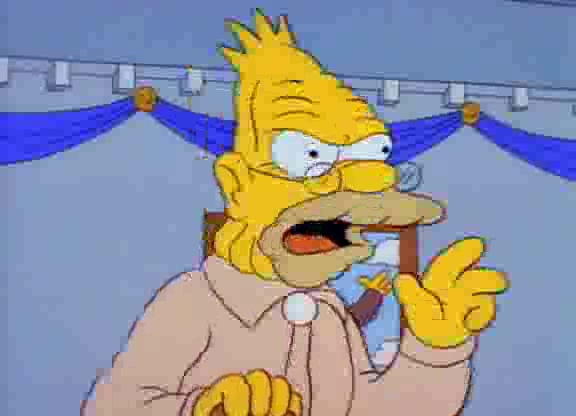

In [17]:
from IPython.display import Image
Image("/content/drive/My Drive/keras-yolo3/testdata/pic_0005.jpg")

### ＜検出後＞

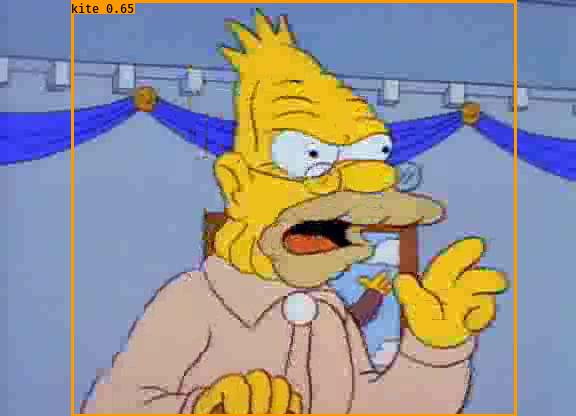

In [18]:
from IPython.display import Image
Image("/content/drive/My Drive/keras-yolo3/testdata/pic_0005_detect.jpg")

クラスラベルが間違っているが、物体検知辞退は正常にできている。

## 【問題6】（アドバンス課題）コードリーディング

上記実装のコードリーディングを行ってください。


まず、YOLOv3[2]の論文において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。  
